In [4]:
%load_ext autoreload
%autoreload 2

import hydra

In [5]:
with hydra.initialize(version_base=None, config_path='config'):
    cfg = hydra.compose(config_name="config")

In [6]:
from text3d2video.pipelines.injection_pipeline import Text3D2Video

method = Text3D2Video(cfg.stable_diffusion.name)

Keyword arguments {'device': device(type='cuda'), 'dtype': torch.float16} are not expected by StableDiffusionPipeline and will be ignored.
Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]/home/jorge/miniconda3/envs/thesis/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Loading pipeline components...: 100%|██████████| 7/7 [00:00<00:00,  8.46it/s]


 19%|█▉        | 6/31 [00:00<00:04,  5.81it/s]

Saved Feature


100%|██████████| 31/31 [00:05<00:00,  5.60it/s]
/home/jorge/miniconda3/envs/thesis/lib/python3.8/site-packages/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion.py:569: FutureWarning: The decode_latents method is deprecated and will be removed in 1.0.0. Please use VaeImageProcessor.postprocess(...) instead
  deprecate("decode_latents", "1.0.0", deprecation_message, standard_warn=False)


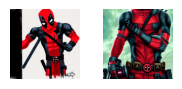

In [59]:
from text3d2video.image_utils import to_pil_image
from text3d2video.ipython_utils import display_ims

# Extract features
method.save_step = 5
method.clear_save_hook()
method.add_save_hook()
images = method.generate(['Deadpool']*2)

display_ims(images)

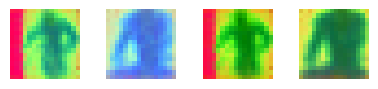

In [61]:
from einops import rearrange

from text3d2video.visualization import RgbPcaUtil

feature = method.saved_feature

feature_maps = rearrange(feature, 'b (h w) c ->  b c h w', h=16, w=16)
feature_flat = rearrange(feature, 'b t c -> (b t) c')

feature_flat.shape
pca = RgbPcaUtil(feature_flat.shape[1])
pca.fit(feature_flat.cpu())
rgb_maps = [pca.feature_map_to_rgb_pil(feature_map.cpu()) for feature_map in feature_maps]

display_ims(rgb_maps)

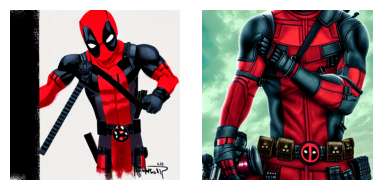

In [8]:
from text3d2video.ipython_utils import display_ims

display_ims(images, scale=2)